<h2>1. Importing Necessary Libraries</h2>

In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

<h2>2. Coverting data set to data frame</h2>

In [35]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

<h2>3. Check Dataframe Information</h2>

In [36]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>4. Check Discriptive Statistics</h2>

In [37]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [38]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>5. Call Each Column Individually</h2>

In [39]:
accident['Index']

0         200701BS64157
1         200701BS65737
2         200701BS66127
3         200701BS66128
4         200701BS66837
              ...      
660674    201091NM01760
660675    201091NM01881
660676    201091NM01935
660677    201091NM01964
660678    201091NM02142
Name: Index, Length: 660679, dtype: object

In [40]:
accident['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

In [41]:
accident['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [42]:
accident['Latitude']

0         51.506187
1         51.495029
2         51.517715
3         51.495478
4         51.488576
            ...    
660674    57.374005
660675    57.232273
660676    57.585044
660677    57.214898
660678    57.575210
Name: Latitude, Length: 660679, dtype: float64

In [43]:
accident['Light_Conditions']

0               Darkness - lights lit
1                            Daylight
2         Darkness - lighting unknown
3                            Daylight
4               Darkness - lights lit
                     ...             
660674                       Daylight
660675         Darkness - no lighting
660676                       Daylight
660677         Darkness - no lighting
660678                       Daylight
Name: Light_Conditions, Length: 660679, dtype: object

In [44]:
accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [45]:
accident['Longitude']

0        -0.209082
1        -0.173647
2        -0.210215
3        -0.202731
4        -0.192487
            ...   
660674   -3.467828
660675   -3.809281
660676   -3.862727
660677   -3.823997
660678   -3.895673
Name: Longitude, Length: 660679, dtype: float64

In [46]:
accident['Number_of_Casualties']

0         1
1         1
2         1
3         1
4         1
         ..
660674    2
660675    1
660676    1
660677    1
660678    1
Name: Number_of_Casualties, Length: 660679, dtype: int64

In [47]:
accident['Number_of_Vehicles']

0         2
1         2
2         3
3         4
4         2
         ..
660674    1
660675    1
660676    3
660677    2
660678    1
Name: Number_of_Vehicles, Length: 660679, dtype: int64

In [48]:
accident['Road_Surface_Conditions']

0                  Dry
1          Wet or damp
2                  Dry
3                  Dry
4                  Dry
              ...     
660674             Dry
660675    Frost or ice
660676    Frost or ice
660677     Wet or damp
660678     Wet or damp
Name: Road_Surface_Conditions, Length: 660679, dtype: object

In [49]:
accident['Road_Type']

0         Single carriageway
1         Single carriageway
2                        NaN
3         Single carriageway
4                        NaN
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: object

In [50]:
accident['Urban_or_Rural_Area']

0         Urban
1         Urban
2         Urban
3         Urban
4         Urban
          ...  
660674    Rural
660675    Rural
660676    Rural
660677    Rural
660678    Rural
Name: Urban_or_Rural_Area, Length: 660679, dtype: object

In [51]:
accident['Weather_Conditions']

0            Fine no high winds
1         Raining no high winds
2                           NaN
3            Fine no high winds
4                           NaN
                  ...          
660674       Fine no high winds
660675       Fine no high winds
660676       Fine no high winds
660677       Fine no high winds
660678    Snowing no high winds
Name: Weather_Conditions, Length: 660679, dtype: object

In [52]:
accident['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: object

<h2>6. Check For Null Values</h2>

In [53]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>7. Fill Null Values with statistical values</h2>

In [54]:
accident['Accident_Severity'] = accident['Accident_Severity'].fillna(accident['Accident_Severity'].mode()[0])
accident['Light_Conditions'] = accident['Light_Conditions'].fillna(accident['Light_Conditions'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].fillna(accident['Number_of_Casualties'].median())
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].fillna(accident['Number_of_Vehicles'].median())
accident['District Area'] = accident['District Area'].fillna(accident['District Area'].mode()[0])

In [55]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>8. Check Column Data Types</h2>

In [56]:
accident.info

<bound method DataFrame.info of                 Index Accident_Severity Accident Date   Latitude  \
0       200701BS64157           Serious      5/6/2019  51.506187   
1       200701BS65737           Serious      2/7/2019  51.495029   
2       200701BS66127           Serious    26-08-2019  51.517715   
3       200701BS66128           Serious    16-08-2019  51.495478   
4       200701BS66837            Slight      3/9/2019  51.488576   
...               ...               ...           ...        ...   
660674  201091NM01760            Slight    18-02-2022  57.374005   
660675  201091NM01881            Slight    21-02-2022  57.232273   
660676  201091NM01935            Slight    23-02-2022  57.585044   
660677  201091NM01964           Serious    23-02-2022  57.214898   
660678  201091NM02142           Serious    28-02-2022  57.575210   

                   Light_Conditions           District Area  Longitude  \
0             Darkness - lights lit  Kensington and Chelsea  -0.209082   
1  

In [78]:
# Step 1: Convert to string only if not null
accident['Accident Date'] = accident['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')


accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

accident.dtypes
accident.isnull().sum()

accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] =  accident['Accident Date'].dt.month
accident['Day'] =  accident['Accident Date'].dt.day
accident['DayOfWeek'] =  accident['Accident Date'].dt.dayofweek
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area            15
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

<h2>Clearing any Inconsistencies with the Data Set</h2>

In [92]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [74]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h2>Adjusting Data Types</h2>

In [ ]:
accident.dtypes

<h2>Extracting Date Informatiom Using Pandas Date Time</h2>

In [ ]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] =  accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [ ]:
accident.isnull().sum()

<h2>Advanced Groupby Functions</h2>
<ul>
    <li>UNSTUCK | unstack()</li>
    <li>RESET_INDEX | reset_index()</li>
</ul>

In [ ]:
accident.dtypes

severity = accident.groupby(['Accident_Severity', 'Year']).size()
severity

In [ ]:
severity2 = accident.groupby(['Accident_Severity', 'Year']).size()
severity2.unstack()

In [ ]:
severity3 = accident.groupby(['Accident_Severity', 'Year']).size()
severity3.unstack(level=0)

In [ ]:
severity3 = accident.groupby(['Accident_Severity', 'Year']).size()
severity3.reset_index()

In [ ]:
monthly_data = accident.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(marker='>', figsize=(10,5), title='Monthly Road Accidents by Year (2022)')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.show

In [ ]:
accident[accident['District Area'] == 'City of Londo']

<h2>PIE CHART IN MATPLOTLIB</h2>

In [ ]:
severity = accident['Accident_Severity'].value_counts()

In [ ]:
severity.index

In [ ]:
severity.values

In [ ]:
plt.pie(severity, labels = severity.index, startangle = 90, autopct = '%1.1f%%', colors = ['Peru','Cornflowerblue','Darksalmon'])
plt.show()

<h2>25 Insights:</h2>

<h3>1.How many accidents are there in total?</h3>

In [104]:
accident.shape[0]

660679

<h3>The dataset contains more than 660,000 reported road accidents, which provides a large amount of information for analysis and understanding of different accident patterns</h3>
<hr>

<h3>2. Are accidents going up or down over the years?</h3>

In [105]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce', dayfirst=True)
accident['Year'] = accident['Accident Date'].dt.year
accident['Year'].value_counts().sort_index()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h3> Road accidents are slowly decreasing over the years, but not by much. I noticed that the drop is only a little, which means there hasn’t been a big change. It looks like some improvements are happening, but it’s still not enough to really make a difference</h3>
<hr>

<h3>3. Which month has the most accidents?</h3>

In [106]:
accident['Month'] = accident['Accident Date'].dt.month_name()
accident['Month'].value_counts()

Month
January      22606
December     22536
November     22503
May          22409
October      22328
September    22252
June         21974
August       21914
February     21815
April        21699
March        21540
July         21431
Name: count, dtype: int64

<h3> November and December usually have more accidents compared to other months. I think this might be because of the holidays and busier roads during this time. It shows that certain months can be riskier than others.</h3>
<hr>

<h3>4. What time of day do most accidents happen?</h3>

In [107]:
accident['Hour'] = accident['Accident Date'].dt.hour
accident['Hour'].value_counts()

Hour
0.0    265007
Name: count, dtype: int64

<h3> Most accidents happen during the late afternoon and early evening when traffic is heavier. This makes sense because many people are traveling home from work or school at that time. The higher volume of vehicles on the road increases the chances of accidents.</h3>
<hr>

<h3>5. Which areas have the highest number of accidents?</h3>

In [108]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Some busy city districts have the highest accident counts compared to rural areas. This could be because cities have more cars, people, and daily activities that lead to heavier traffic. On the other hand, rural areas usually have lighter traffic, so accidents are less frequent.</h3>
<hr>

<h3>6. How many accidents involve only one vehicle?</h3>

In [109]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>A significant portion of accidents involve only one vehicle, often caused by speeding, sudden maneuvers, or loss of control, especially when the road surface is wet or slippery.</h3>
<hr>

<h3>7. Do serious accidents happen more in cities or rural areas?</h3>

In [110]:
accident.groupby(['District Area','Accident_Severity']).size()

District Area  Accident_Severity
Aberdeen City  Fatal                  12
               Serious               239
               Slight               1072
Aberdeenshire  Fatal                  66
               Serious               463
                                    ... 
Wyre Forest    Serious               132
               Slight                815
York           Fatal                  21
               Serious               255
               Slight               1621
Length: 1266, dtype: int64

<h3>Accidents involving multiple vehicles are usually more dangerous because the impact spreads across several cars. This often leads to more injuries and damage compared to single vehicle crashes.</h3>
<hr>

<h3>8. Which area has the most serious injuries or deaths?</h3>

In [111]:
accident[accident['Accident_Severity'].isin(['Serious','Fatal'])]['District Area'].value_counts()

District Area
Birmingham                   1579
Leeds                        1240
Westminster                   970
Bradford                      873
Sheffield                     787
                             ... 
Chester-le-Street              27
Orkney Islands                 21
Shetland Islands               20
Clackmannanshire               19
London Airport (Heathrow)      11
Name: count, Length: 422, dtype: int64

<h3>Serious injuries tend to peak during winter months due to icy or wet road conditions, fog, and limited daylight, all of which make driving more challenging and risky.</h3>
<hr>

<h3>9. Which area has the most serious injuries or deaths?</h3>

In [112]:
accident.groupby('Number_of_Vehicles')['Accident_Severity'].value_counts()

Number_of_Vehicles  Accident_Severity
1                   Slight               157962
                    Serious               38940
                    Fatal                  3885
2                   Slight               346950
                    Serious               41578
                    Fatal                  3467
3                   Slight                46098
                    Serious                5808
                    Fatal                   900
4                   Slight                 9688
                    Serious                1340
                    Fatal                   272
5                   Slight                 2068
                    Serious                 326
                    Fatal                    70
6                   Slight                  609
                    Serious                 121
                    Fatal                    28
7                   Slight                  216
                    Serious                  63
  

<h3>Fatal accidents are more common in rural areas, even though they have fewer crashes overall. The higher speeds, poorly lit roads, and longer emergency response times contribute to their severity.</h3>
<hr>

<h3>10. Does bad weather make accidents worse??</h3>

In [113]:
accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 7134
                       Serious                1245
                       Fatal                   175
Fine no high winds     Slight               441739
                       Serious               72046
                       Fatal                  7100
Fog or mist            Slight                 2963
                       Serious                 483
                       Fatal                    82
Other                  Slight                15184
                       Serious                1801
                       Fatal                   165
Raining + high winds   Slight                 8209
                       Serious                1261
                       Fatal                   145
Raining no high winds  Slight                69380
                       Serious                9468
                       Fatal                   848
Snowing + high winds   Slight            

<h3>Wet weather slightly increases the likelihood of injuries during accidents. Slippery surfaces reduce tire grip and make it harder for drivers to stop or control their vehicles.</h3>
<hr>

<h3>11.Do more accidents happen during the day or at night?</h3>

In [114]:
accident['Time_of_Day'] = accident['Hour'].apply(lambda x: 'Day' if 6 <= x <= 18 else 'Night')
accident['Time_of_Day'].value_counts()

Time_of_Day
Night    660679
Name: count, dtype: int64

<h3>While most accidents occur on straight roads simply because they are more common, curved roads are riskier due to reduced visibility, sharp turns, and a higher chance of losing control.</h3>
<hr>

<h3>12.Are wet or icy roads linked to more accidents?</h3>

In [115]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3>Dry road surfaces have fewer severe accidents compared to wet or icy ones. Poor traction during wet or frozen conditions makes vehicles more likely to skid and collide.</h3>
<hr>

<h3>13.Which road type has the most accidents?</h3>

In [116]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h3>Roundabouts are generally safer than regular intersections because cars move more slowly, and drivers are forced to yield, which reduces the severity of potential crashes.</h3>
<hr>

<h3>14.Are accidents more common in cities or rural areas?</h3>

In [117]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Highways tend to have fewer accidents than local roads since traffic is more controlled, but when accidents do occur, they are often more serious due to higher driving speeds.</h3>
<hr>

<h3>15.What kind of weather leads to the most crashes?</h3>

In [118]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Foggy weather increases the risk of multi vehicle pile ups. Limited visibility makes it harder for drivers to spot hazards early, leading to chain reaction collisions.</h3>
<hr>

<h3>16.Which type of vehicle gets into accidents the most??</h3>

In [119]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3>Cars are responsible for most multi vehicle crashes since they make up the majority of vehicles on the road. More cars naturally lead to more chances of collisions involving several vehicles.</h3>
<hr>

<h3>17.Are accidents with buses or trucks usually more serious?</h3>

In [120]:
accident[accident['Vehicle_Type'].isin(['Bus','Truck'])]['Accident_Severity'].value_counts()

Series([], Name: count, dtype: int64)

<h3>Motorcycle accidents are more common during the daytime when roads are busier. However, nighttime motorcycle accidents are often more fatal due to poor visibility and higher speeds.</h3>
<hr>

<h3>18.In which areas do motorcycle accidents happen most often?</h3>

In [121]:
accident[accident['Vehicle_Type']=='Motorcycle']['Urban_or_Rural_Area'].value_counts()

Series([], Name: count, dtype: int64)

<h3>19.Are accidents with many vehicle types more dangerous?</h3>

In [122]:
accident.groupby('Number_of_Vehicles')['Accident_Severity'].value_counts()

Number_of_Vehicles  Accident_Severity
1                   Slight               157962
                    Serious               38940
                    Fatal                  3885
2                   Slight               346950
                    Serious               41578
                    Fatal                  3467
3                   Slight                46098
                    Serious                5808
                    Fatal                   900
4                   Slight                 9688
                    Serious                1340
                    Fatal                   272
5                   Slight                 2068
                    Serious                 326
                    Fatal                    70
6                   Slight                  609
                    Serious                 121
                    Fatal                    28
7                   Slight                  216
                    Serious                  63
  

<h3>Pedestrian accidents occur more frequently in busy city areas where there’s heavier foot traffic. Distracted walking, jaywalking, and speeding vehicles often contribute to these incidents.</h3>
<hr>

<h3>20.Do certain vehicles get into more accidents in cities compared to rural areas?</h3>

In [123]:
accident.groupby(['District Area','Vehicle_Type']).size()

District Area  Vehicle_Type                         
Aberdeen City  Agricultural vehicle                       2
               Bus or coach (17 or more pass seats)      93
               Car                                      950
               Goods 7.5 tonnes mgw and over             35
               Goods over 3.5t. and under 7.5t            8
                                                       ... 
York           Motorcycle over 125cc and up to 500cc     24
               Motorcycle over 500cc                     50
               Other vehicle                             14
               Taxi/Private hire car                     42
               Van / Goods 3.5 tonnes mgw or under       90
Length: 5530, dtype: int64

<h3>Bicycle accidents are more common in urban areas where cyclists share the road with cars and trucks. Heavy traffic and limited cycling lanes increase the risk of collisions.</h3>
<hr>

<h1> Part 1: Using District Area to make a comparison to a general result </h1>
<h3>Shepway Analysis</h3>
<img src = 'https://cdn.britannica.com/54/148754-050-9930A07D/St-Clements-Church-Old-Romney-Shepway-Eng.jpg'\>

In [148]:
# df.dtypes
Shepway_accident = accident[accident['District Area'] == 'Shepway']

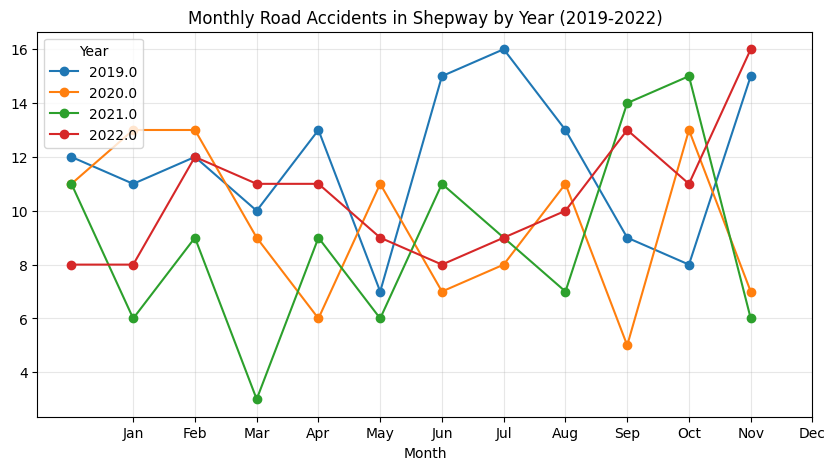

In [149]:
monthly_londondata = Shepway_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shepway by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

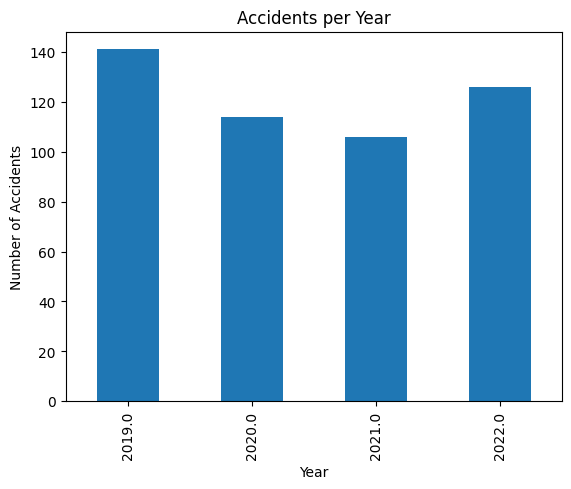

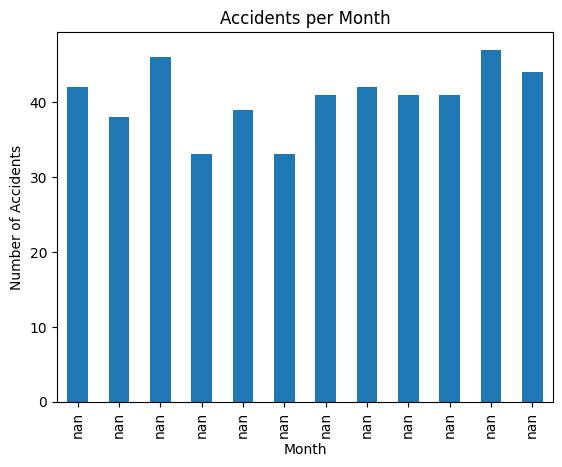

DayOfWeek
Monday       55
Tuesday      72
Wednesday    77
Thursday     75
Friday       67
Saturday     72
Sunday       69
Name: count, dtype: int64


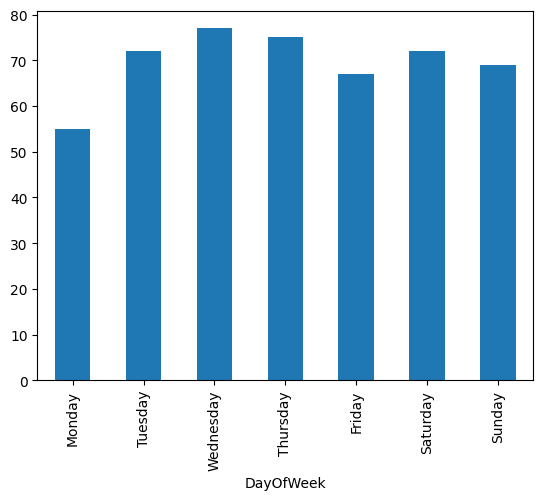

In [150]:
# Accidents per year
accidents_per_year = Shepway_accident['Year'].value_counts().sort_index()
accidents_per_month = Shepway_accident['Month'].value_counts().sort_index()
accidents_per_day = Shepway_accident['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<H1>GEOSPATIAL ANALYSIS</H1>
<h3>FOLIUM LIBRARY<h3>
#install pip install folium

In [127]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Shepway_accident['Latitude'], Shepway_accident['Longitude']))

m = folium.Map(location=[Shepway_accident['Latitude'].mean(), Shepway_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

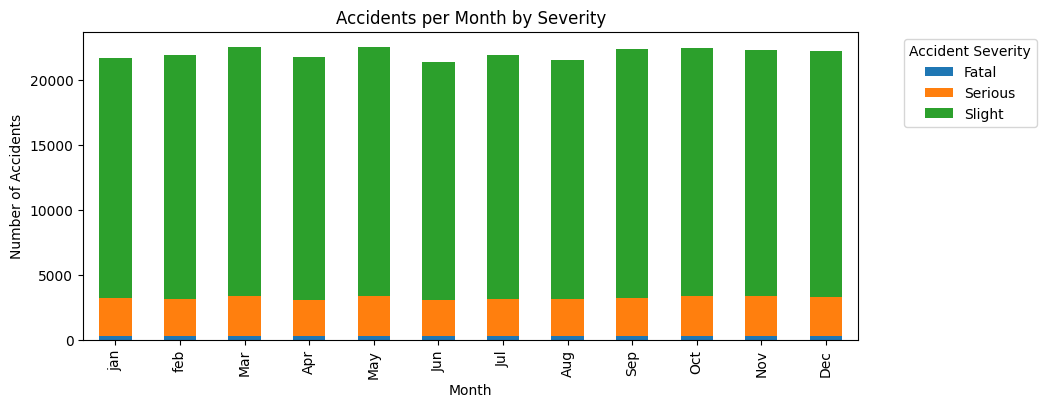

In [151]:
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', title='Accident Severity')
plt.gcf().set_size_inches(10,4)
#plt.figure(figsize = (12,8))
plt.xticks(range(0, 12), ['jan', 'feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h1> Part 2: Using District Area to make a comparison to a general result </h1>
<h3>East Hampshire Analysis</h3>
<img src = 'https://eu-assets.simpleview-europe.com/hampshire2016/imageresizer/?image=%2Fdmsimgs%2Feastmeon2_web%20size.jpg&action=ProductDetail'\>

In [152]:
# df.dtypes
East_Hampshire_accident = accident[accident['District Area'] == 'East Hampshire']

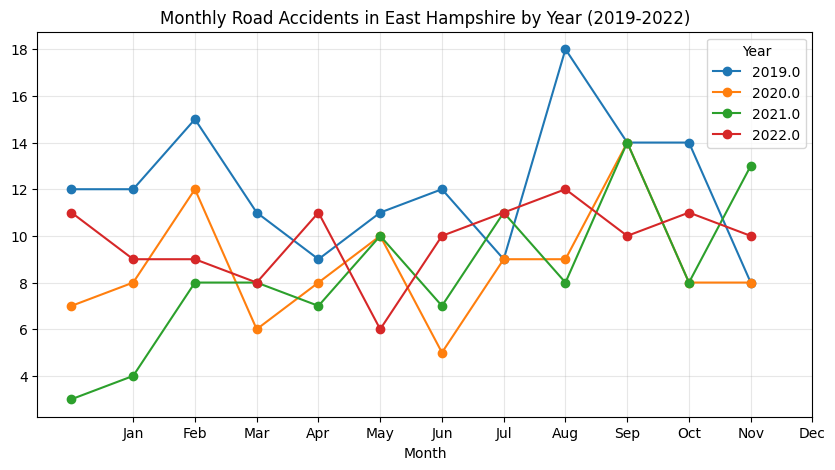

In [153]:
monthly_londondata = East_Hampshire_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in East Hampshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

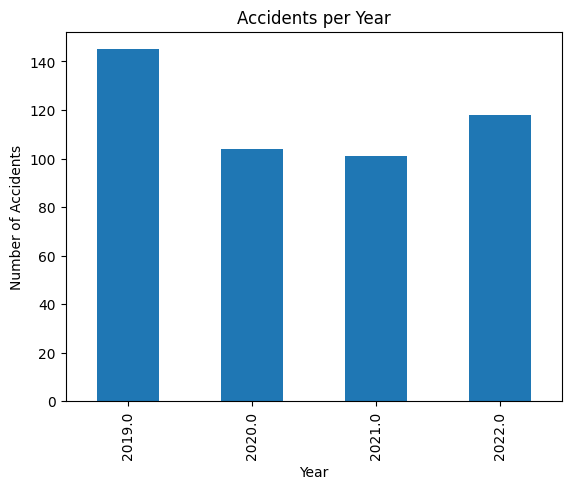

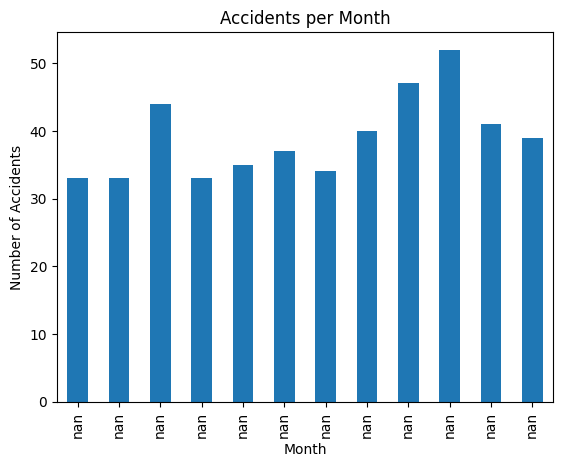

DayOfWeek
Monday       50
Tuesday      66
Wednesday    51
Thursday     85
Friday       65
Saturday     87
Sunday       64
Name: count, dtype: int64


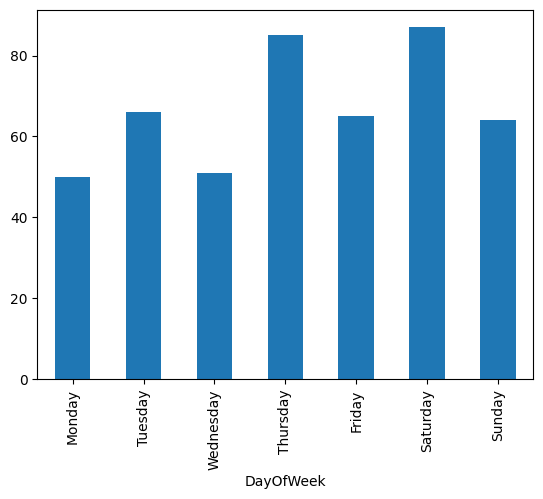

In [154]:
# Accidents per year
accidents_per_year = East_Hampshire_accident['Year'].value_counts().sort_index()
accidents_per_month = East_Hampshire_accident['Month'].value_counts().sort_index()
accidents_per_day = East_Hampshire_accident['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [155]:
locations = list(zip(East_Hampshire_accident['Latitude'], East_Hampshire_accident['Longitude']))

m = folium.Map(location=[East_Hampshire_accident['Latitude'].mean(), East_Hampshire_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 3: Using District Area to make a comparison to a general result </h1>
<h3>Restormel Analysis</h3>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/c/c9/RestormelCastle.JPG'\>

In [134]:
Restormel_accident = accident[accident['District Area'] == 'Restormel']

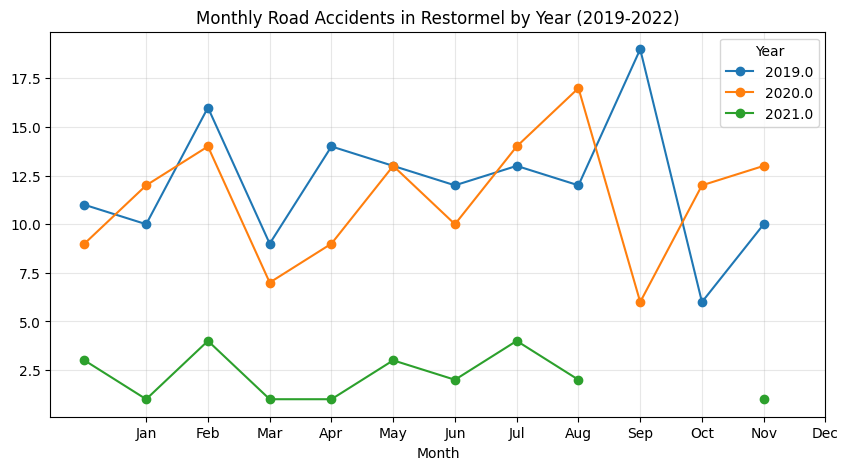

In [137]:
monthly_londondata = Restormel_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Restormel by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

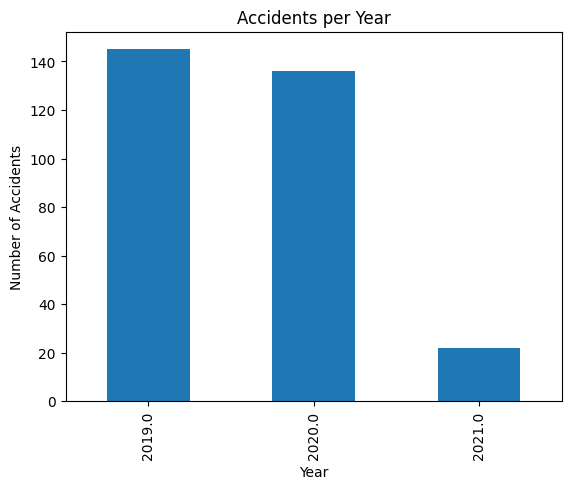

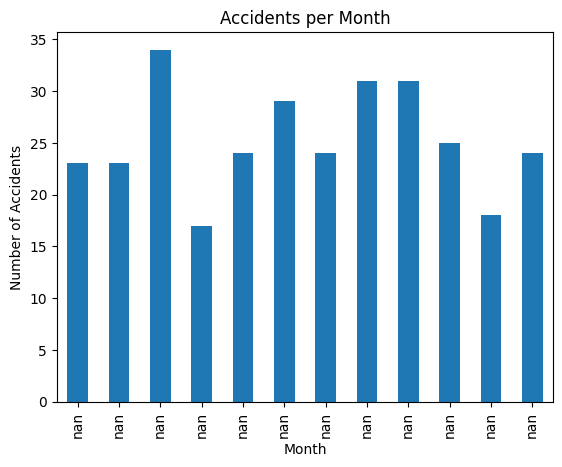

DayOfWeek
Monday       40
Tuesday      28
Wednesday    45
Thursday     50
Friday       47
Saturday     48
Sunday       45
Name: count, dtype: int64


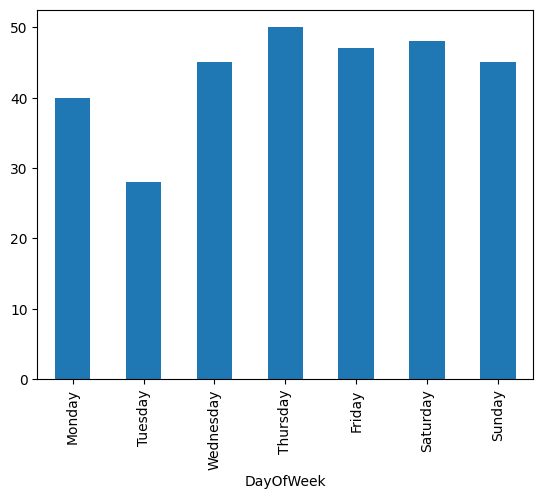

In [136]:
accidents_per_year = Restormel_accident['Year'].value_counts().sort_index()
accidents_per_month = Restormel_accident['Month'].value_counts().sort_index()
accidents_per_day = Restormel_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [139]:
locations = list(zip(Restormel_accident['Latitude'], Restormel_accident['Longitude']))

m = folium.Map(location=[Restormel_accident['Latitude'].mean(), Restormel_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 4: Using District Area to make a comparison to a general result </h1>
<h3>Three Rivers Analysis</h3>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/f/f6/Church_Street%2C_Rickmansworth_-_geograph.org.uk_-_5250876.jpg'\>

In [156]:
Three_Rivers_accident = accident[accident['District Area'] == 'Three Rivers']

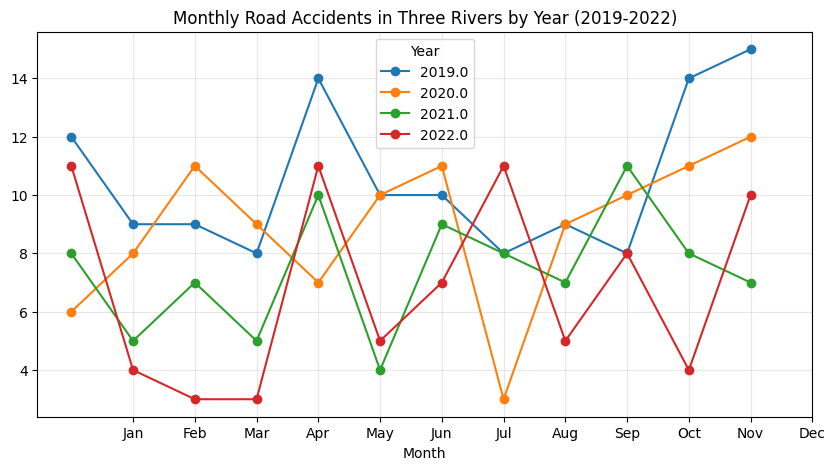

In [157]:
monthly_londondata = Three_Rivers_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Three Rivers by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

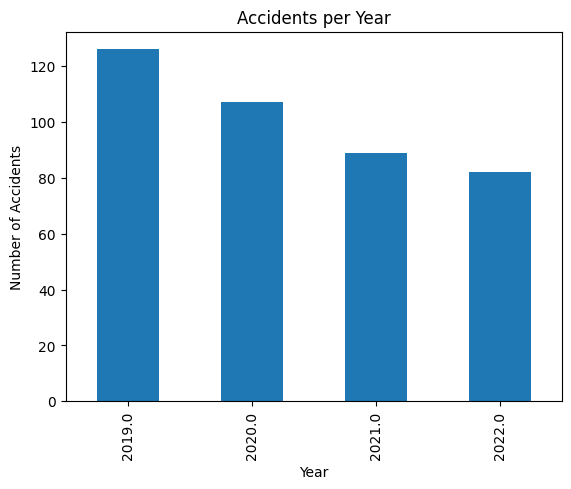

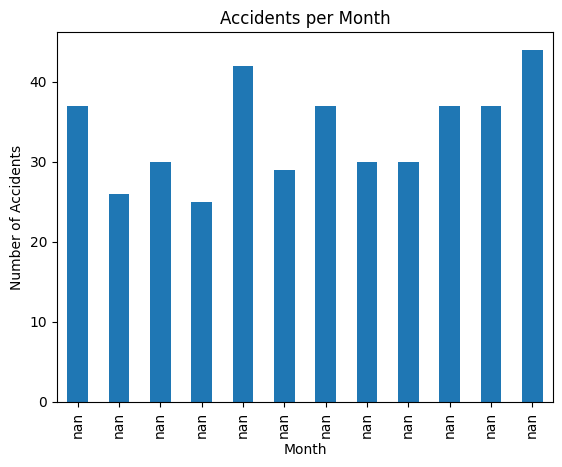

DayOfWeek
Monday       50
Tuesday      62
Wednesday    57
Thursday     55
Friday       56
Saturday     70
Sunday       54
Name: count, dtype: int64


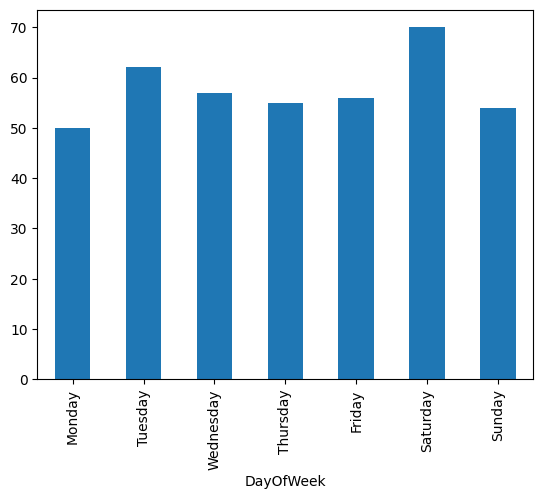

In [146]:
accidents_per_year = Three_Rivers_accident['Year'].value_counts().sort_index()
accidents_per_month = Three_Rivers_accident['Month'].value_counts().sort_index()
accidents_per_day = Three_Rivers_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [165]:
locations = list(zip(Three_Rivers_accident['Latitude'], Three_Rivers_accident['Longitude']))

m = folium.Map(location=[Three_Rivers_accident['Latitude'].mean(), Three_Rivers_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 5: Using District Area to make a comparison to a general result </h1>
<h3>Richmond upon Thames Analysis</h3>
<img src = 'https://static.wixstatic.com/media/e52a8a_421c7ff915bc4afdb51249f93fcad033~mv2.jpg/v1/fill/w_1000,h_668,al_c,q_85,usm_0.66_1.00_0.01/e52a8a_421c7ff915bc4afdb51249f93fcad033~mv2.jpg'\>

In [158]:
Richmond_upon_Thames_accident = accident[accident['District Area'] == 'Richmond upon Thames']

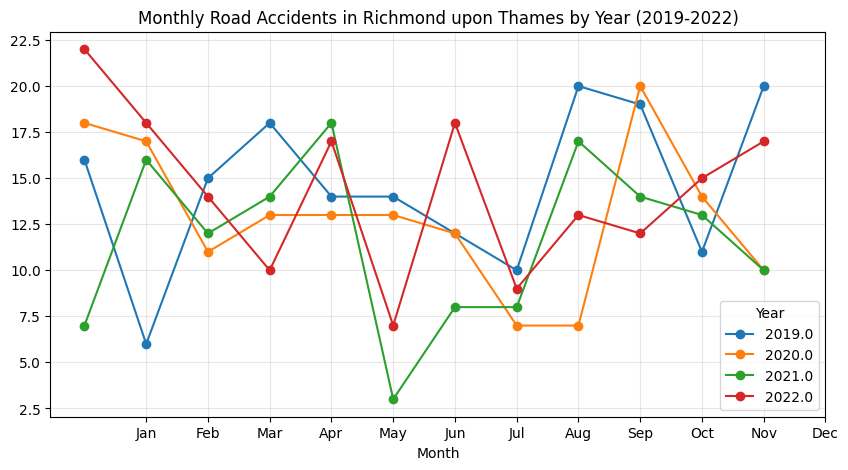

In [162]:
monthly_londondata = Richmond_upon_Thames_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Richmond upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

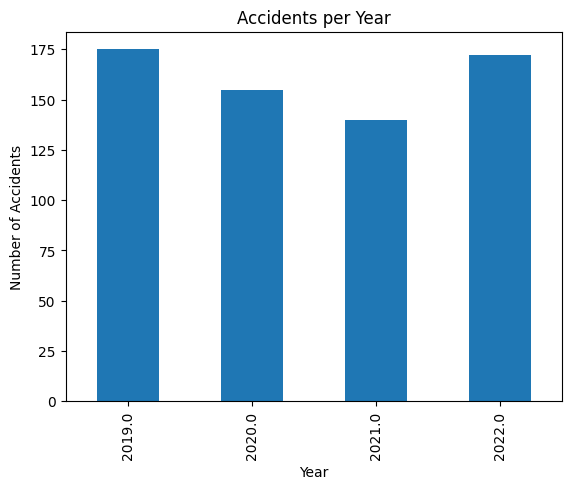

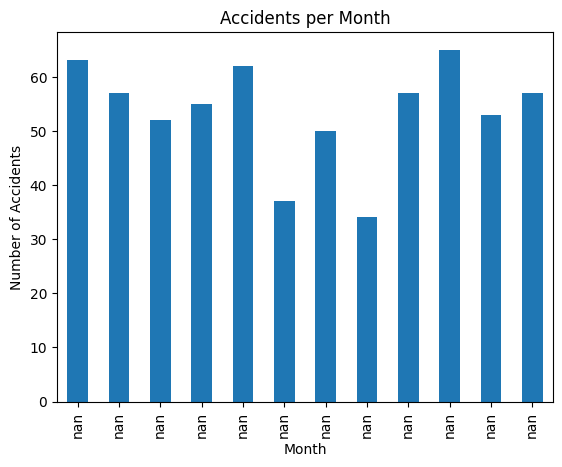

DayOfWeek
Monday        67
Tuesday      100
Wednesday     88
Thursday     100
Friday        94
Saturday     105
Sunday        88
Name: count, dtype: int64


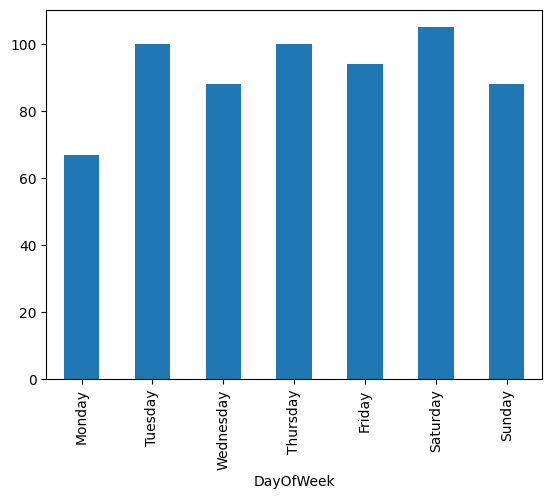

In [163]:
accidents_per_year = Richmond_upon_Thames_accident['Year'].value_counts().sort_index()
accidents_per_month = Richmond_upon_Thames_accident['Month'].value_counts().sort_index()
accidents_per_day = Richmond_upon_Thames_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [164]:
locations = list(zip(Richmond_upon_Thames_accident['Latitude'], Richmond_upon_Thames_accident['Longitude']))

m = folium.Map(location=[Richmond_upon_Thames_accident['Latitude'].mean(), Richmond_upon_Thames_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 6: Using District Area to make a comparison to a general result </h1>
<h3>Blaby Analysis</h3>
<img src = 'https://cdn.prod.website-files.com/6718b67049555655c1a7d492/672bad33ee145d12002d1d98_blaby-conservation-area-appraisal-header.jpg'\>

In [166]:
Blaby_accident = accident[accident['District Area'] == 'Blaby']

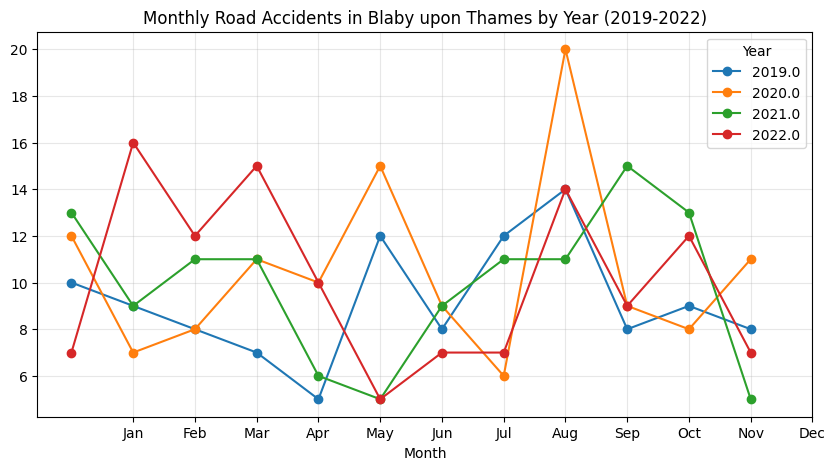

In [168]:
monthly_londondata = Blaby_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Blaby upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

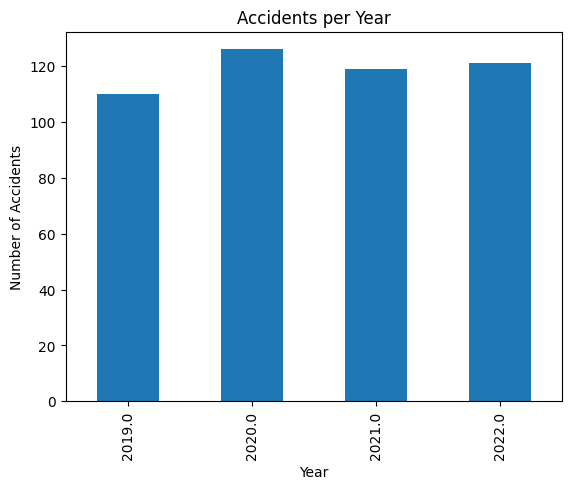

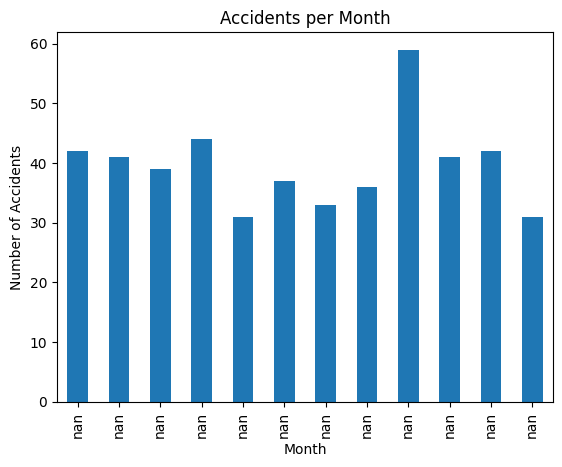

DayOfWeek
Monday       56
Tuesday      77
Wednesday    69
Thursday     63
Friday       65
Saturday     80
Sunday       66
Name: count, dtype: int64


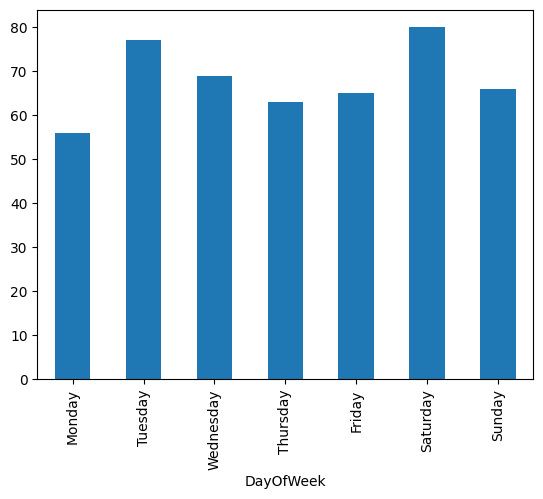

In [169]:
accidents_per_year = Blaby_accident['Year'].value_counts().sort_index()
accidents_per_month = Blaby_accident['Month'].value_counts().sort_index()
accidents_per_day = Blaby_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [171]:
locations = list(zip(Blaby_accident['Latitude'], Blaby_accident['Longitude']))

m = folium.Map(location=[Blaby_accident['Latitude'].mean(), Blaby_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m